<a href="https://colab.research.google.com/github/samiha-mahin/WaterQuality/blob/main/WQ_EnsembleDT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Decision Tree Accuracy: 0.597444089456869
✅ Random Forest Accuracy: 0.6773162939297125
✅ Gradient Boosting Accuracy: 0.646964856230032
✅ Ensemble Accuracy: 0.6293929712460063
📊 Classification Report (Ensemble):
               precision    recall  f1-score   support

           0       0.69      0.72      0.71       386
           1       0.52      0.48      0.50       240

    accuracy                           0.63       626
   macro avg       0.60      0.60      0.60       626
weighted avg       0.62      0.63      0.63       626



<ipython-input-5-d5686887893a>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


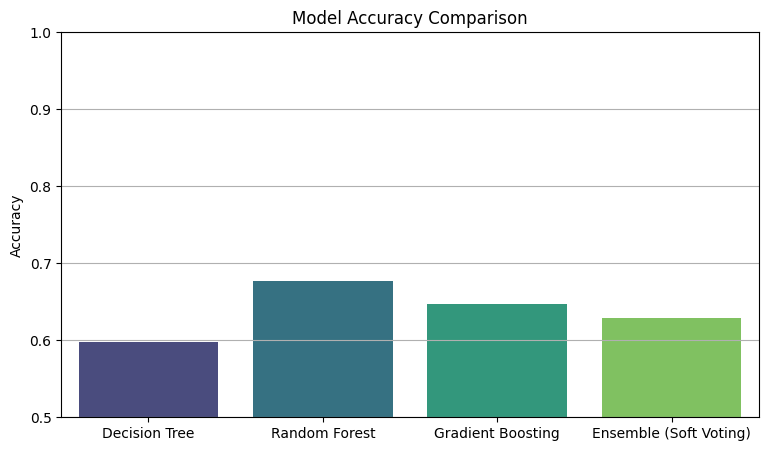

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("cleaned_data.csv")

# Feature Engineering
df["Solids_per_Hardness"] = df["Solids"] / (df["Hardness"] + 1e-5)
df["pH_Turbidity"] = df["ph"] * df["Turbidity"]
df["Sulfate_Chloramines"] = df["Sulfate"] * df["Chloramines"]

# Split features and target
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Define models
dt_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

# Ensemble (soft voting)
ensemble_model = VotingClassifier(estimators=[
    ('dt', dt_model),
    ('rf', rf_model),
    ('gb', gb_model)
], voting='soft')

# Train models
dt_model.fit(X_resampled, y_resampled)
rf_model.fit(X_resampled, y_resampled)
gb_model.fit(X_resampled, y_resampled)
ensemble_model.fit(X_resampled, y_resampled)

# Evaluate
dt_acc = accuracy_score(y_test, dt_model.predict(X_test_scaled))
rf_acc = accuracy_score(y_test, rf_model.predict(X_test_scaled))
gb_acc = accuracy_score(y_test, gb_model.predict(X_test_scaled))
ensemble_acc = accuracy_score(y_test, ensemble_model.predict(X_test_scaled))

# Print results
print("✅ Decision Tree Accuracy:", dt_acc)
print("✅ Random Forest Accuracy:", rf_acc)
print("✅ Gradient Boosting Accuracy:", gb_acc)
print("✅ Ensemble Accuracy:", ensemble_acc)
print("📊 Classification Report (Ensemble):\n", classification_report(y_test, ensemble_model.predict(X_test_scaled)))

# Accuracy plot
plt.figure(figsize=(9, 5))
model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Ensemble (Soft Voting)']
accuracies = [dt_acc, rf_acc, gb_acc, ensemble_acc]

sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.ylim(0.5, 1.0)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.grid(axis='y')
plt.show()


<Figure size 1200x800 with 0 Axes>

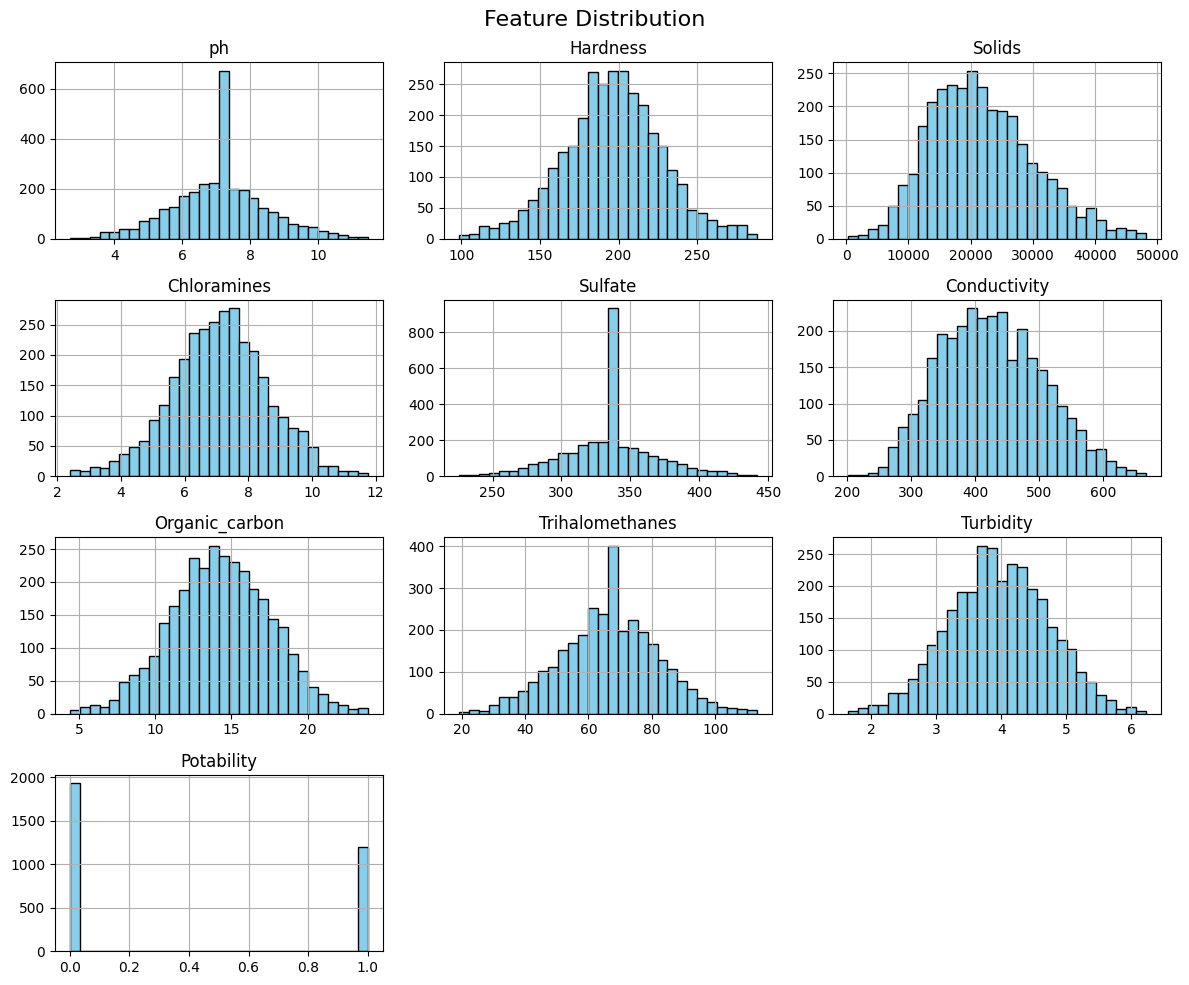

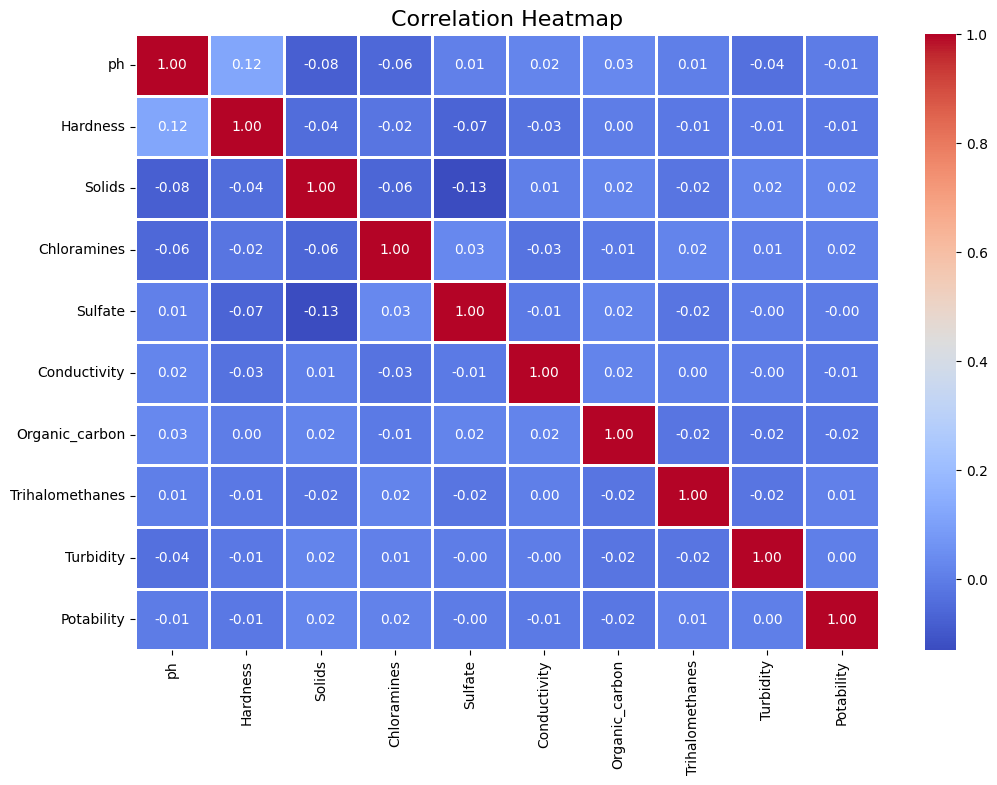

<ipython-input-6-f508e1633433>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Potability', data=df, palette='coolwarm')


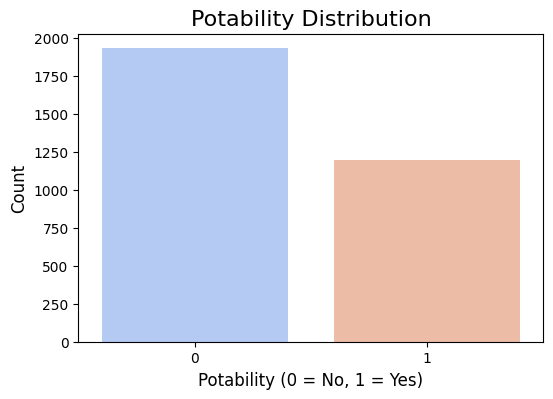

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
df = pd.read_csv("cleaned_data.csv")

# Step 2: Visualize the feature distributions
plt.figure(figsize=(12, 8))
df.hist(bins=30, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distribution', fontsize=16)
plt.tight_layout()
plt.show()

# Step 3: Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=1)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Step 4: Distribution of the target variable (Potability)
plt.figure(figsize=(6, 4))
sns.countplot(x='Potability', data=df, palette='coolwarm')
plt.title('Potability Distribution', fontsize=16)
plt.xlabel('Potability (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()
